# Imports

In [115]:
import pandas as pd
import polars as pl
import pyreadstat
import missingno as msgo

In [116]:
# Why I choosing the level 07 
# As you mention this we need to Understand the user food, health and finance background

In [117]:
lev_07_path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-07\data\lev-07_merged.parquet"
df = pd.read_parquet(lev_07_path)
pdf = pl.read_parquet(lev_07_path)

# Total vs MP

In [118]:
print(f"Toatl record present in Level 07 dataset {pdf.shape[0]}")

Toatl record present in Level 07 dataset 523906


In [119]:
mp_data = df[df['State'] == '23']

print(f"Total Madhya Pradesh data present in this Level 07 Dataset: {mp_data.shape[0]}")

Total Madhya Pradesh data present in this Level 07 Dataset: 28210


In [120]:
mp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28210 entries, 21320 to 523709
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Survey_Name                      28210 non-null  object 
 1   Year                             28210 non-null  object 
 2   FSU_Serial_No                    28210 non-null  object 
 3   Sector                           28210 non-null  object 
 4   State                            28210 non-null  object 
 5   NSS_Region                       28210 non-null  object 
 6   District                         28210 non-null  object 
 7   Stratum                          28210 non-null  object 
 8   Sub_stratum                      28210 non-null  object 
 9   Panel                            28210 non-null  object 
 10  Sub_sample                       28210 non-null  object 
 11  FOD_Sub_Region                   28210 non-null  object 
 12  Sample_SU_No      

# Our Requirements

In [122]:
# Our useful variables are 


lev_07_food = [
    'Free_other_items_received',
    'Total_other_items',
    'Fee_waiver_received',
    'Num_fee_waiver_received',
]

lev_07_health = [
    'Ayushman_beneficiary',
    'Num_ayushman_beneficiaries',
    'Hospitalization_case',
    'Medical_benefit_received',
    'Num_medical_beneficiaries',
    'Medical_benefit_amount',
]

lev_07_digital = [
    'Online_purchase_fuel_light',
    'Online_purchase_toilet_articles',
    'Online_purchase_education',
    'Online_purchase_medicine',
    'Online_purchase_services',
    'Multiplier'
]

lev_07_occupation = [
    'Any_member_attended_school',
    'Num_govt_school_attended',
    'Num_private_school_attended',
    'Free_textbooks_received',
    'Total_textbooks',
    'Free_stationery_received',
    'Total_stationery',
    'Free_school_bag_received',
    'Total_school_bags',
]

lev_07_govt = [
    'Kerosene_ration_card',
    'LPG_subsidy_received',
    'LPG_subsidized_cylinders',
    'Free_electricity',
]

lev_07_cols = (
    lev_07_food
    + lev_07_health
    + lev_07_digital
    + lev_07_occupation
    + lev_07_govt
)

mp_pdf = pdf[lev_07_cols]
mp_data = mp_data[lev_07_cols]

In [123]:
mp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28210 entries, 21320 to 523709
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Free_other_items_received        28210 non-null  object 
 1   Total_other_items                1074 non-null   float64
 2   Fee_waiver_received              28210 non-null  object 
 3   Num_fee_waiver_received          2564 non-null   float64
 4   Ayushman_beneficiary             28210 non-null  object 
 5   Num_ayushman_beneficiaries       12606 non-null  float64
 6   Hospitalization_case             28210 non-null  object 
 7   Medical_benefit_received         28210 non-null  object 
 8   Num_medical_beneficiaries        428 non-null    float64
 9   Medical_benefit_amount           428 non-null    float64
 10  Online_purchase_fuel_light       4538 non-null   float64
 11  Online_purchase_toilet_articles  644 non-null    float64
 12  Online_purchase_ed

# Null values

In [ ]:
msgo.matrix(mp_data)

In [ ]:
msgo.bar(mp_data)

In [ ]:
msgo.heatmap(mp_data)

In [ ]:
msgo.dendrogram(mp_data)

# Percentage value of null

In [ ]:
print("Percentage of null values ")
for col in mp_data.columns:
    null_percentage = (mp_data[col].isnull().sum() / mp_data.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")

In [130]:
print("Percentage of null values greater than the 90% \n ")
for col in mp_data.columns:
    null_percentage = (mp_data[col].isnull().sum() / mp_data.shape[0]) * 100
    if null_percentage > 90:
        print(f"{col} ---> {null_percentage:.2f}%")

Percentage of null values greater than the 90% 
 
Total_other_items ---> 96.19%
Num_fee_waiver_received ---> 90.91%
Num_medical_beneficiaries ---> 98.48%
Medical_benefit_amount ---> 98.48%
Online_purchase_toilet_articles ---> 97.72%
Online_purchase_education ---> 98.88%
Online_purchase_medicine ---> 98.80%
Total_stationery ---> 99.65%
Total_school_bags ---> 99.77%


# Verify form the source 

- https://microdata.gov.in/NADA/index.php/catalog/237/data-dictionary/F7?file_name=LEVEL%20-%2007%20(Section%204.2)

In [ ]:
mp_data['Total_other_items'].isnull().sum()

In [127]:
(mp_data['Total_other_items'].isnull().sum()) / (mp_data.shape[0])

np.float64(0.9619283941864587)

In [ ]:
mp_data.shape[0]

In [ ]:
null_value_in_this_col = mp_data['Total_other_items'].isnull().sum()
total_recorded = mp_data.shape[0]

In [131]:
(null_value_in_this_col / total_recorded ) * 100

np.float64(96.19283941864587)

In [ ]:
null_value_in_this_col = mp_data['Total_other_items'].isnull().sum()
total_recorded = mp_data.shape[0]
(null_value_in_this_col / total_recorded ) * 100

print('According to the official data')
whole_valid_recorded = 13_429
whole_invalid_recorded = 2_48_524
total = whole_invalid_recorded + whole_valid_recorded 
(whole_invalid_recorded / total) * 100



In [ ]:
(null_value_in_this_col / total_recorded ) * 100

In [ ]:
(whole_valid_recorded / total) * 100

In [ ]:
(null_value_in_this_col / total_recorded ) * 100

# Functions

In [163]:
def null_percentage_compare_with_original_and_mp_data(col:str,
                                                      valid_acc_to_official_data: int,
                                                      invalid_acc_to_official_data: int) -> None:
    
    print("Comparison with original and MP data for level 07\n")
    print(f" ========== {col} ========== \n")
    
    print('\nAccording to the official data')
    whole_valid_recorded = valid_acc_to_official_data
    whole_invalid_recorded = invalid_acc_to_official_data
    total = whole_invalid_recorded + whole_valid_recorded 
    
    inval_off = (whole_invalid_recorded / total) * 100
    val_off = (whole_valid_recorded / total) * 100
    
    print(f"Total Official Recoded : {total}")
    print(f"Official Invalid record: {whole_valid_recorded} --> {inval_off:.2f}%")
    print(f"Official Valid record: {whole_invalid_recorded} --> {val_off:.2f}%")   

    print("\nFor our MP Data")
    null_value_in_this_col = mp_data[col].isnull().sum()
    total_recorded = mp_data.shape[0]
    mp_record = (null_value_in_this_col / total_recorded ) * 100
    
    print(f"Our MP dataset contains total record: {total_recorded}")
    print(f"Null Value in MP data: {null_value_in_this_col}")
    print(f"Null value Percentage in this MP data {mp_record:.2f}%")
    
    print("\n============================================= ")


# Total_other_items

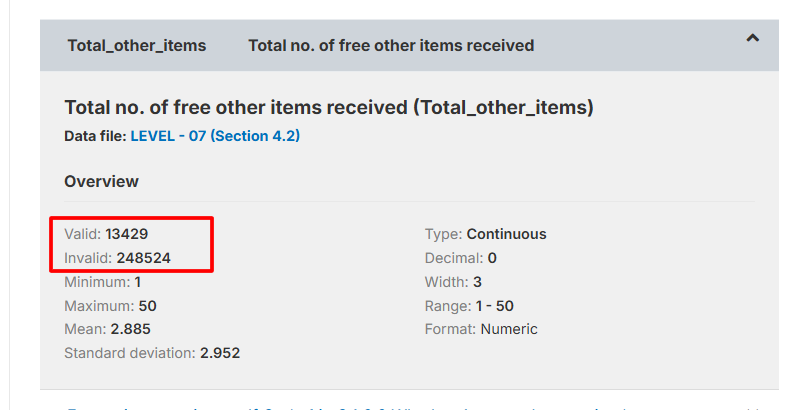

In [164]:
null_percentage_compare_with_original_and_mp_data(
    col='Total_other_items',
    valid_acc_to_official_data=13_429,
    invalid_acc_to_official_data=2_48_524
)

Comparison with original and MP data for level 07

 ========== Total_other_items ========== 


According to the official data
Total Official Recoded : 261953
Official Invalid record: 13429 --> 94.87%
Official Valid record: 248524 --> 5.13%

For our MP Data
Our MP dataset contains total record: 28210
Null Value in MP data: 27136
Null value Percentage in this MP data 96.19%



# Num_fee_waiver_received

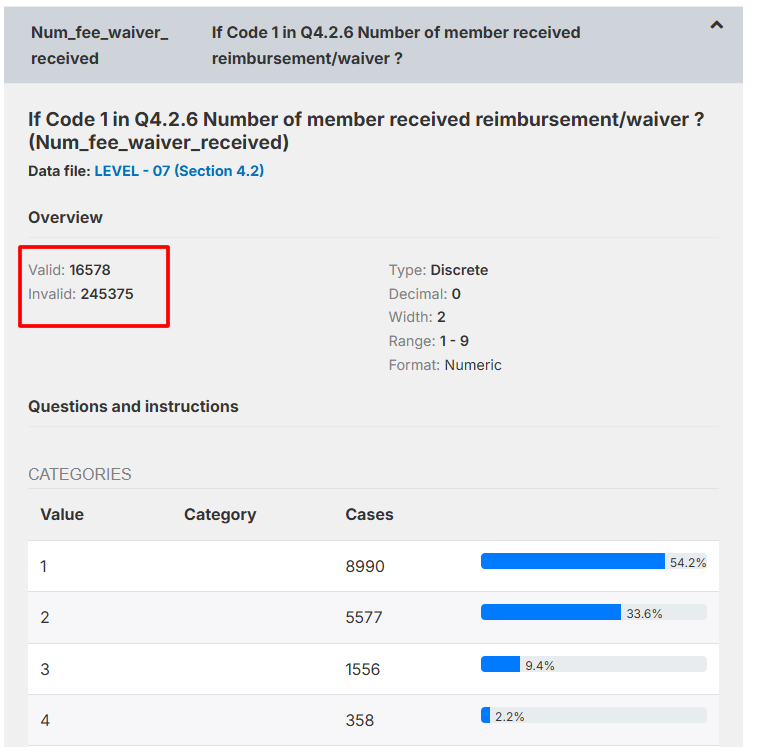

In [165]:
null_percentage_compare_with_original_and_mp_data(
    col='Num_fee_waiver_received',
    valid_acc_to_official_data= 16578,
    invalid_acc_to_official_data=245375
)

Comparison with original and MP data for level 07

 ========== Num_fee_waiver_received ========== 


According to the official data
Total Official Recoded : 261953
Official Invalid record: 16578 --> 93.67%
Official Valid record: 245375 --> 6.33%

For our MP Data
Our MP dataset contains total record: 28210
Null Value in MP data: 25646
Null value Percentage in this MP data 90.91%



# Num_medical_beneficiaries

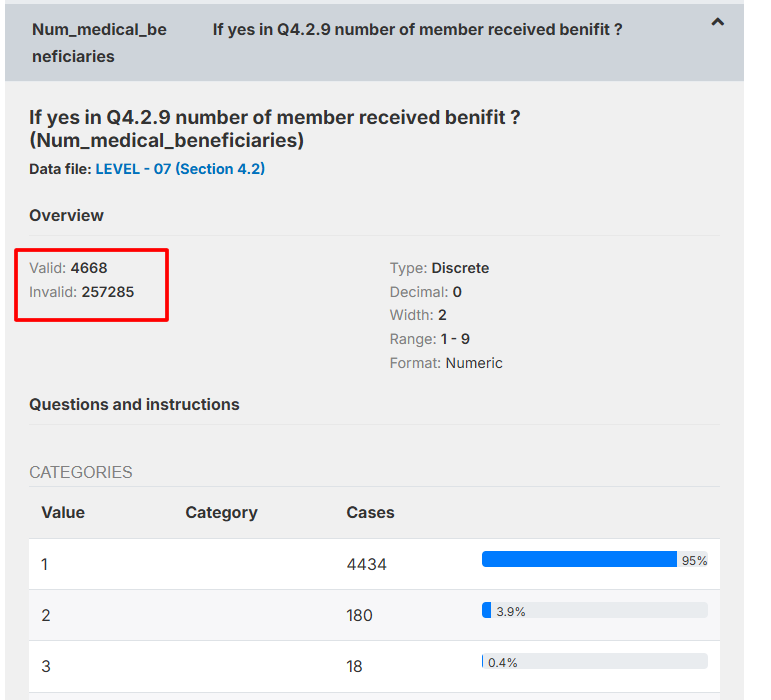

In [166]:
null_percentage_compare_with_original_and_mp_data(
    col='Num_medical_beneficiaries',
    valid_acc_to_official_data= 4668,
    invalid_acc_to_official_data=257285
)

Comparison with original and MP data for level 07

 ========== Num_medical_beneficiaries ========== 


According to the official data
Total Official Recoded : 261953
Official Invalid record: 4668 --> 98.22%
Official Valid record: 257285 --> 1.78%

For our MP Data
Our MP dataset contains total record: 28210
Null Value in MP data: 27782
Null value Percentage in this MP data 98.48%



# Medical_benefit_amount

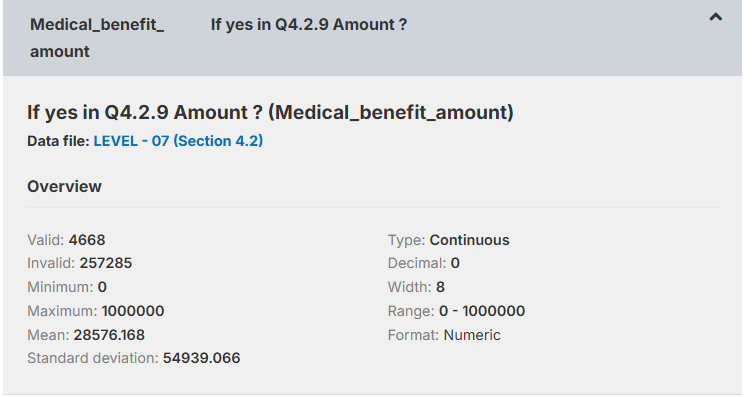

In [167]:
null_percentage_compare_with_original_and_mp_data(
    col='Medical_benefit_amount',
    valid_acc_to_official_data=4668 ,
    invalid_acc_to_official_data=257285
)

Comparison with original and MP data for level 07

 ========== Medical_benefit_amount ========== 


According to the official data
Total Official Recoded : 261953
Official Invalid record: 4668 --> 98.22%
Official Valid record: 257285 --> 1.78%

For our MP Data
Our MP dataset contains total record: 28210
Null Value in MP data: 27782
Null value Percentage in this MP data 98.48%



# Online_purchase_education

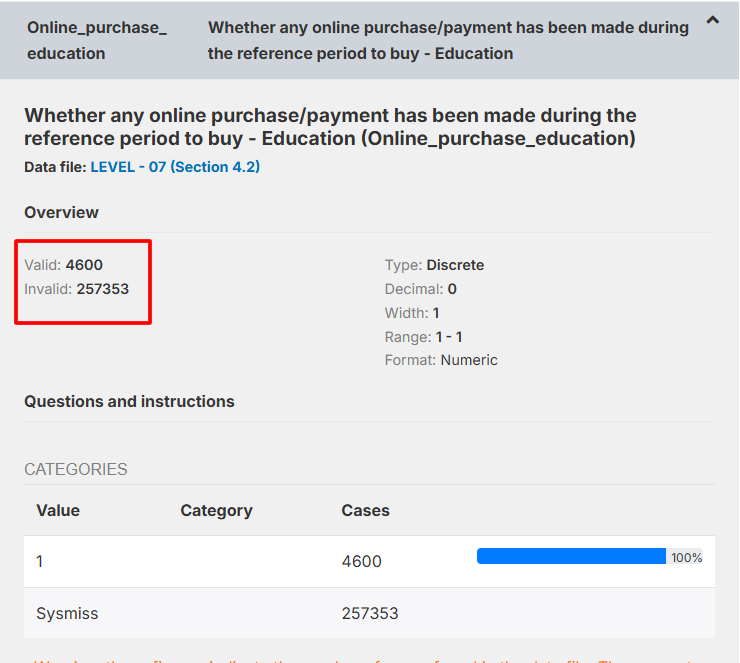

In [168]:
null_percentage_compare_with_original_and_mp_data(
    col='Online_purchase_education',
    valid_acc_to_official_data=4600 ,
    invalid_acc_to_official_data=257353
)

Comparison with original and MP data for level 07

 ========== Online_purchase_education ========== 


According to the official data
Total Official Recoded : 261953
Official Invalid record: 4600 --> 98.24%
Official Valid record: 257353 --> 1.76%

For our MP Data
Our MP dataset contains total record: 28210
Null Value in MP data: 27894
Null value Percentage in this MP data 98.88%



# Online_purchase_medicine 

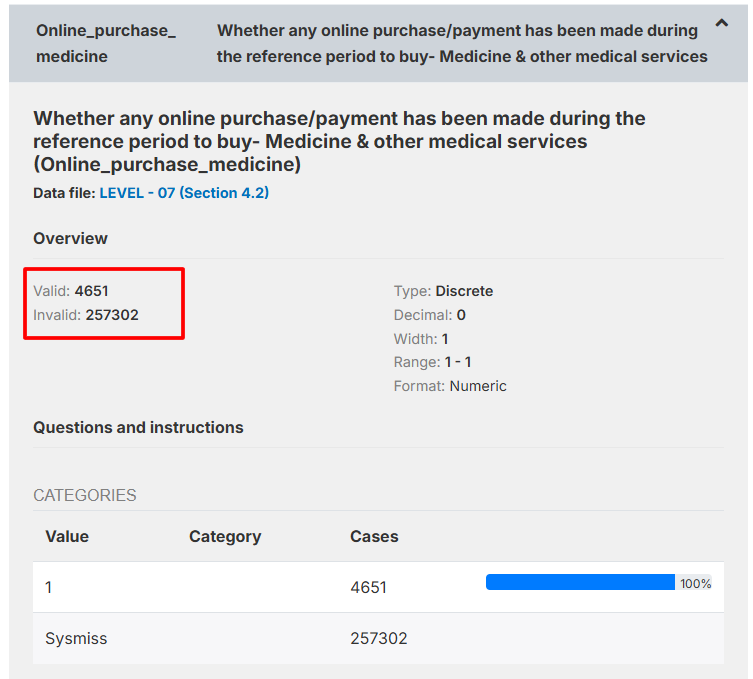

In [169]:
null_percentage_compare_with_original_and_mp_data(
    col='Online_purchase_medicine',
    valid_acc_to_official_data= 4651,
    invalid_acc_to_official_data=257302
)

Comparison with original and MP data for level 07

 ========== Online_purchase_medicine ========== 


According to the official data
Total Official Recoded : 261953
Official Invalid record: 4651 --> 98.22%
Official Valid record: 257302 --> 1.78%

For our MP Data
Our MP dataset contains total record: 28210
Null Value in MP data: 27872
Null value Percentage in this MP data 98.80%



In [ ]:
null_percentage_compare_with_original_and_mp_data(
    col='',
    valid_acc_to_official_data= ,
    invalid_acc_to_official_data=
)